In [3]:
import pandas as pd
import numpy as np
import random

# Dataset

In [4]:
df = pd.read_csv('Train_Set.csv')
df.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


In [5]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [6]:
df.shape

(1309, 25)

In [8]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1309.00000,1309.000000,1132.000000,1260.000000,1288.000000,1288.000000,1298.000000,1301.000000,1301.000000,1301.000000,...,1301.000000,1298.000000,1301.000000,1301.000000,1268.000000,1268.000000,1291.000000,1297.000000,1293.000000,1309.000000
mean,2000.20932,26.968678,0.141858,0.130900,0.203408,0.201218,45.418867,298.709744,299.212952,295.216352,...,81.944253,45.418867,16.712139,4.820369,27.175972,7.965140,32.395352,22.123901,40.268368,25.443086
std,5.06854,14.949909,0.139445,0.117430,0.072705,0.083134,44.117546,1.358886,1.255650,1.527773,...,6.890153,44.117546,1.533863,3.580420,1.281559,2.057656,1.896993,1.606459,48.742412,44.989763
min,1990.00000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1996.00000,14.000000,0.045762,0.051606,0.155989,0.144632,9.692500,297.671429,298.257143,294.098571,...,77.342857,9.692500,15.520000,2.300000,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2001.00000,27.000000,0.124088,0.120876,0.195764,0.187779,37.410000,298.658571,299.292857,295.585714,...,80.270000,37.410000,17.038571,2.771429,27.400000,7.242857,32.800000,22.200000,24.300000,13.000000
75%,2004.00000,40.000000,0.248398,0.213689,0.247735,0.243679,69.450000,299.855714,300.185714,296.437143,...,85.120000,69.450000,17.950000,7.414286,28.142857,9.304167,33.800000,23.300000,55.900000,29.000000
max,2008.00000,53.000000,0.501029,0.445000,0.473400,0.546017,390.600000,302.200000,302.928571,297.852857,...,98.457143,390.600000,19.731429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


# Missing values

In [10]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  177
ndvi_nw                                   49
ndvi_se                                   21
ndvi_sw                                   21
precipitation_amt_mm                      11
reanalysis_air_temp_k                      8
reanalysis_avg_temp_k                      8
reanalysis_dew_point_temp_k                8
reanalysis_max_air_temp_k                  8
reanalysis_min_air_temp_k                  8
reanalysis_precip_amt_kg_per_m2            8
reanalysis_relative_humidity_percent       8
reanalysis_sat_precip_amt_mm              11
reanalysis_specific_humidity_g_per_kg      8
reanalysis_tdtr_k                          8
station_avg_temp_c                        41
station_diur_temp_rng_c                   41
station_max_temp_c                        18
station_mi

In [12]:
df = df.fillna(df.mean())

In [13]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [14]:
df.shape

(1309, 25)

# Outlier removal

In [15]:
from scipy import stats

In [16]:
df.shape

(1309, 25)

# Encoding categorical variables

In [17]:
from sklearn import preprocessing

In [18]:
df.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


In [21]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [22]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1309.00000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2000.20932,26.968678,0.141858,0.130900,0.203408,0.201218,45.418867,298.709744,299.212952,295.216352,...,81.944253,45.418867,16.712139,4.820369,27.175972,7.965140,32.395352,22.123901,40.268368,25.443086
std,5.06854,14.949909,0.129667,0.115210,0.072119,0.082463,43.931645,1.354724,1.251805,1.523093,...,6.869050,43.931645,1.529165,3.569454,1.261314,2.025150,1.883895,1.599073,48.443376,44.989763
min,1990.00000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1996.00000,14.000000,0.056750,0.054267,0.157150,0.145057,9.810000,297.674286,298.264286,294.114286,...,77.357143,9.810000,15.532857,2.300000,26.328571,6.528571,31.100000,21.100000,8.700000,5.000000
50%,2001.00000,27.000000,0.141858,0.127050,0.196686,0.189943,38.300000,298.670000,299.285714,295.567143,...,80.308571,38.300000,17.018571,2.785714,27.357143,7.300000,32.800000,22.200000,24.900000,13.000000
75%,2004.00000,40.000000,0.227871,0.209400,0.246667,0.242129,68.740000,299.850000,300.178571,296.435714,...,85.065714,68.740000,17.948571,7.400000,28.100000,9.100000,33.700000,23.300000,55.100000,29.000000
max,2008.00000,53.000000,0.501029,0.445000,0.473400,0.546017,390.600000,302.200000,302.928571,297.852857,...,98.457143,390.600000,19.731429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [25]:
df = df.drop(columns = ['week_start_date'])

In [26]:
df.head(4)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3


In [27]:
label_encoder = preprocessing.LabelEncoder()

In [28]:
df['city'] = label_encoder.fit_transform(df['city'])
df.head(3)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


# Normalization

nothing

# Feature Engineering

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

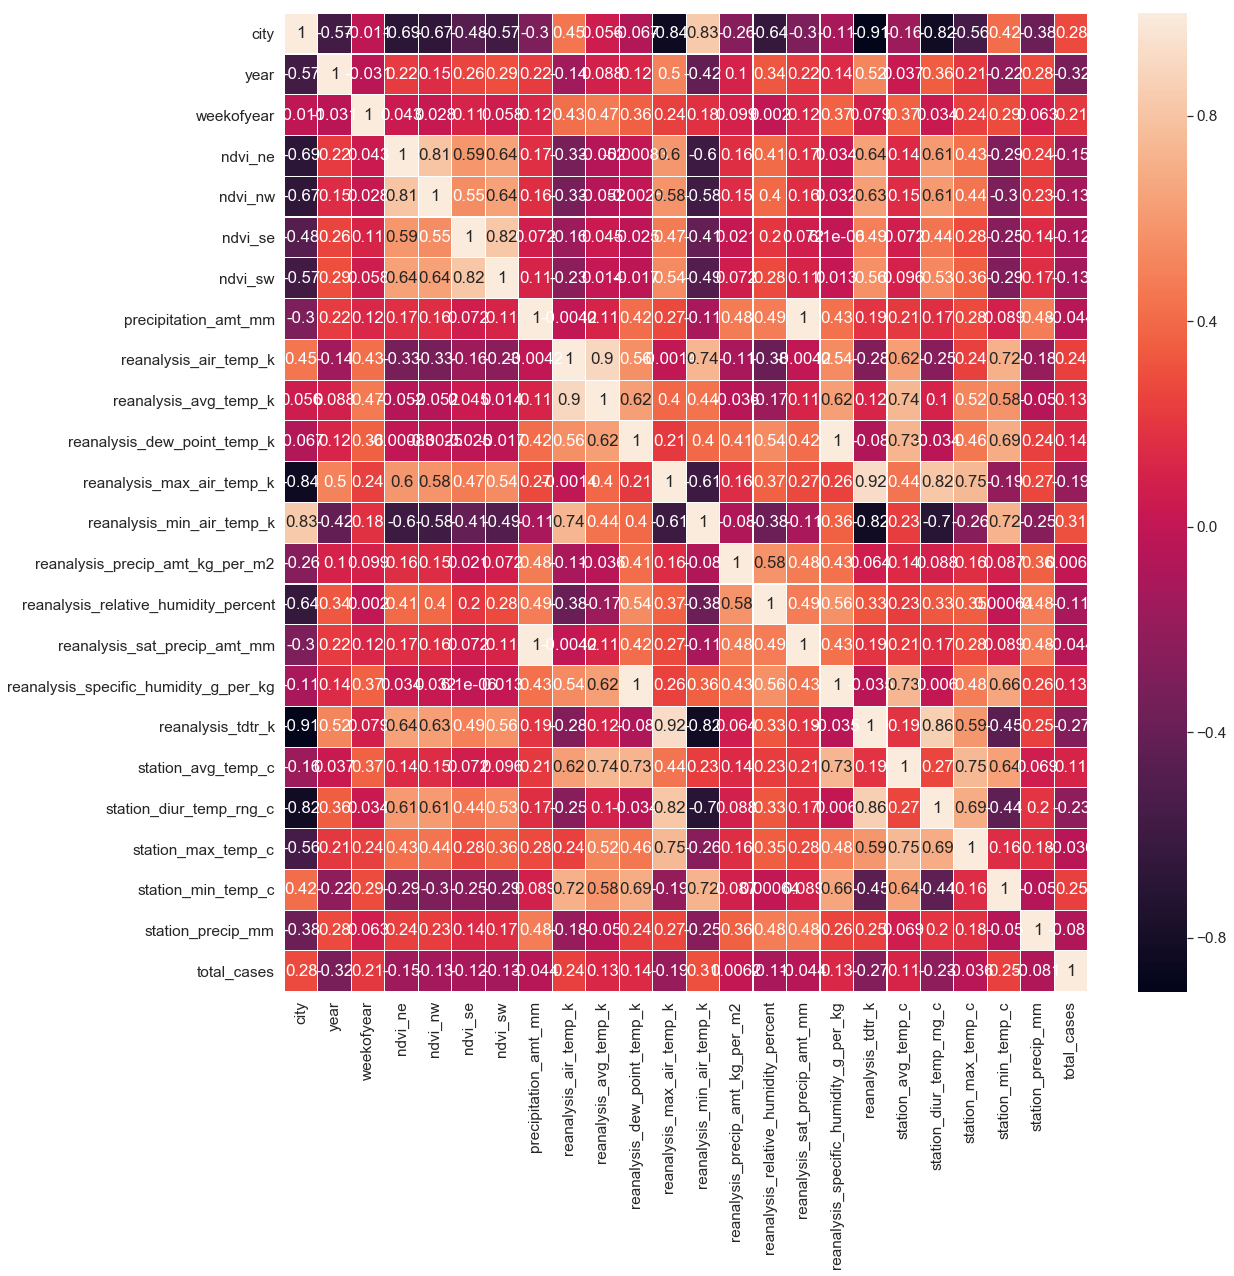

In [32]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [33]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [35]:
columns_to_drop = find_correlation(df.drop(columns=['total_cases']) , 0.9)
df4 = df.drop(columns=columns_to_drop)

In [36]:
df.head(3)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


In [37]:
df4.shape

(1309, 19)

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier()
y = df.copy(deep = True)['total_cases']
model = rf.fit(df.drop('total_cases', axis = 1), y)

C:\Users\BGP\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


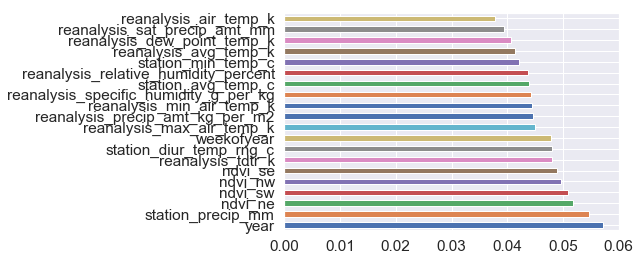

In [40]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('total_cases', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

In [41]:
df.head(3)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


In [42]:
X_train = df.drop('total_cases', axis = 1)

In [43]:
X_train.head(4)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0


In [44]:
y_train = df.copy(deep = True)['total_cases']

In [45]:
y_train.head(4)

0    4
1    5
2    4
3    3
Name: total_cases, dtype: int64

# Test set 

In [50]:
dff = pd.read_csv('Test_Set.csv')
dff.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2007,1,2007-01-01,0.2643,0.05124,0.148443,0.144600,0.00,298.667143,...,12.40,76.528571,0.00,15.595714,1.871429,25.357143,4.985714,28.3,21.7,21.7
1,sj,2007,2,2007-01-08,NaN,-0.03805,0.185157,0.206543,0.00,298.567143,...,16.30,74.811429,0.00,15.115714,2.114286,25.085714,6.557143,29.4,21.1,14.8
2,sj,2007,3,2007-01-15,-0.0192,-0.00430,0.096300,0.065771,63.41,298.217143,...,60.49,77.647143,63.41,15.368571,3.042857,24.971429,6.185714,28.3,20.6,21.4


In [53]:
dff.shape

(147, 24)

In [75]:
dff = dff.fillna(dff.mean())

In [76]:
dff.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int6

In [77]:
dff['city'] = label_encoder.fit_transform(dff['city'])

In [78]:
dff.head(3)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,2007,1,0.264300,0.05124,0.148443,0.144600,0.00,298.667143,298.892857,...,12.40,76.528571,0.00,15.595714,1.871429,25.357143,4.985714,28.3,21.7,21.7
1,1,2007,2,0.146088,-0.03805,0.185157,0.206543,0.00,298.567143,298.685714,...,16.30,74.811429,0.00,15.115714,2.114286,25.085714,6.557143,29.4,21.1,14.8
2,1,2007,3,-0.019200,-0.00430,0.096300,0.065771,63.41,298.217143,298.321429,...,60.49,77.647143,63.41,15.368571,3.042857,24.971429,6.185714,28.3,20.6,21.4


In [70]:
print(columns_to_drop)

['city', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k']


In [71]:
dff =dff.drop(columns = ['week_start_date'])

KeyError: "['week_start_date'] not found in axis"

In [79]:
dff.shape

(147, 23)

In [80]:
X_test = dff

# Random Forest Classifier

In [46]:
from sklearn.metrics import accuracy_score

In [81]:
model = RandomForestClassifier(max_depth = 20)
model.fit(X_train, y_train)
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

0.9847211611917495


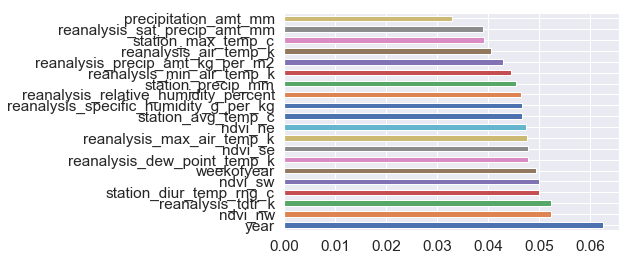

In [51]:
importance = model.feature_importances_
feat_importances_act = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_train)
    cla_pred.append(accuracy_score(y_train,predictions))
    print(name,accuracy_score(y_train,predictions))

C:\Users\BGP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BGP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


('Logistic Regression :', 0.1970970206264324)
('Decision Tree Classification :', 1.0)
('Gradient Boosting Classification :', 1.0)
('Ada Boosting Classification :', 0.0962566844919786)
('Extra Tree Classification :', 1.0)
('K-Neighbors Classification :', 0.2727272727272727)


C:\Users\BGP\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('Support Vector Classification :', 0.9770817417876242)
('Gaussian Naive Bayes :', 0.1970970206264324)


In [82]:
test_predictions = model.predict(X_test)

In [84]:
print(test_predictions)

[  7   6  17  20  10   7  12  18  10   3   5   3   7  23   3   8   3   3
   5  11   5   4   6  14   5  26   5  21   5  10  10  15  10  19  14  21
   6   5   5 137  17  13   4   7   7  10   2  13  10  17  11   6   7   8
  12   3   0  20   9   9  20   9   4  10   3   7   2   6   4   4   5   8
   0  13  11   4   7   6   5  11  22   6   1   5   0  20   6   0   5   5
   0   2   0   3  11   0   6   0   2   1   5   5   5   6  13   0   0   6
   6   5   0   5   6  16   6   0   8   2   3   2  10   1  29   4   8   2
   5   1   5   4   4  16   3   6   5   4  35   1   8   7   5   0   4   3
   1   3   6]


In [85]:
type(test_predictions)

numpy.ndarray

In [86]:
dfn = pd.DataFrame (test_predictions)

In [99]:
filepath = 'Testpred.xlsx'
file2path = 'Testcity.xlsx'

In [100]:
dfn.to_excel(filepath, index = False)

In [101]:
dfnn = dff[['city', 'year', 'weekofyear']].copy()

In [102]:
dfnn.to_excel(file2path, index = False)